In [ ]:
from math import pi
from itertools import product

import numpy as np
from oscar import plot_2d_landscape

problem = "po"
p = 1
qubit_pool = [10]
seed_pool = range(1)
# resolutions = [128, 32]
# bounds = [(-2.2, -0.6), (0.9, 1.3)]
# bounds = [(-4, 0), (0, 1)]
resolutions = [64, 64]
bounds = [(-pi, pi), (-pi, pi)]

for i, (n, seed) in enumerate(product(qubit_pool, seed_pool)):
    filename = f"data/{problem}/landscapes/{p=}/{n=}/{problem}-{p=}-{n=}-{seed=}-{bounds}-{resolutions}.pckl"
    landscape = np.load(filename,allow_pickle=True)
    plot_2d_landscape(landscape)
    print(landscape.optimal_params)


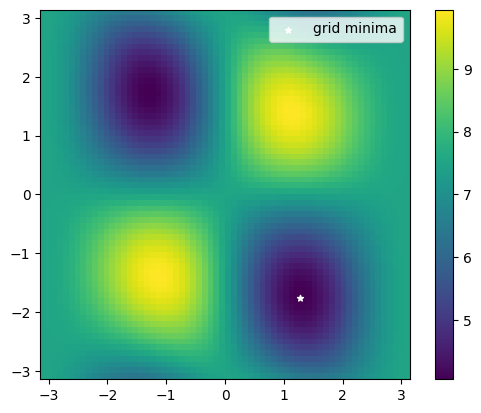

[ 1.27627202 -1.76714587]
1.2310672582 1.5706881168


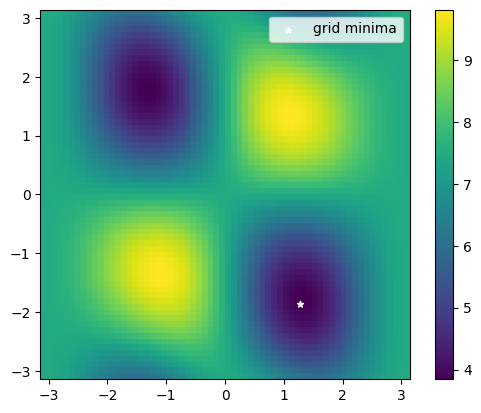

[ 1.27627202 -1.86532064]
1.2310672582 1.5706881168


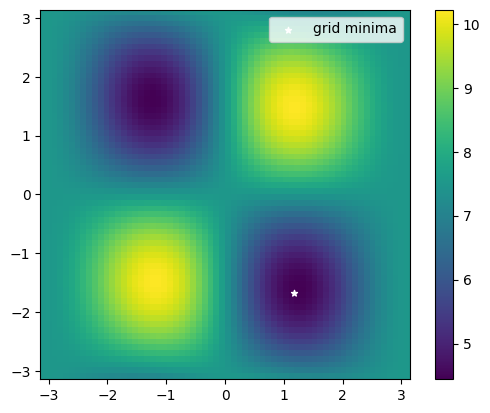

[ 1.17809725 -1.6689711 ]
1.2310672582 1.5706881168


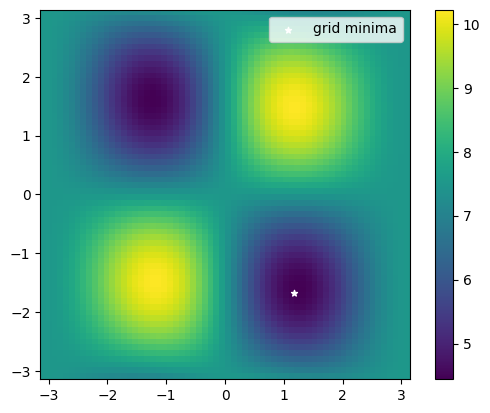

[ 1.17809725 -1.6689711 ]
1.2310672582 1.5706881168


In [2]:
from math import pi
from itertools import product

import numpy as np
from matplotlib import pyplot as plt
from oscar import plot_2d_landscape
from qokit.parameter_utils import get_fixed_gamma_beta

from evaluate_energy import load_problem, get_evaluate_energy

problem = "maxcut"
p = 1
qubit_pool = [10]
seed_pool = range(4)
# resolutions = [128, 32]
# bounds = [(-2.2, -0.6), (0.9, 1.3)]
# bounds = [(-4, 0), (0, 1)]
resolutions = [64, 64]
bounds = [(-pi, pi), (-pi, pi)]

for i, (n, seed) in enumerate(product(qubit_pool, seed_pool)):
    filename = f"data/{problem}-unweighted/landscapes/{p=}/{n=}/{problem}-{p=}-{n=}-{seed=}-{bounds}-{resolutions}.pckl"
    landscape = np.load(filename,allow_pickle=True)
    plot_2d_landscape(landscape)
    print(landscape.optimal_params)

    instance, precomputed_energies = load_problem(problem, n, seed)
    eval_func = get_evaluate_energy(
        instance,
        precomputed_energies,
        p,
        objective="expectation",
        simulator="c",
    )
    gamma, beta = get_fixed_gamma_beta(3, p)
    gamma = gamma[0]
    beta = beta[0] * 4
    print(gamma, beta)
    # print((eval_func([gamma-0.1, beta]) - eval_func([gamma, beta])) / (eval_func([gamma, beta-0.1]) - eval_func([gamma, beta])))
    # for l in [landscape.landscape[1:] - landscape.landscape[:-1], landscape.landscape[:,1:] - landscape.landscape[:,:-1]]:
    #     plt.figure()
    #     plt.imshow(
    #         l.T,
    #         extent=landscape.param_bounds.flat,
    #         origin="lower",
    #         interpolation="none",
    #     )
    #     plt.colorbar()
    #     plt.show()
